# Exporatory Data Analysis (EDA) on Bike Sales Dataset

In [14]:
import pandas as pd
df = pd.read_csv("../../data/Sales.csv", index_col=0, parse_dates=True) # Load the dataset and parse dates
df.head()  # Display the first few rows of the dataset

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [27]:
df.loc["2013"]

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2013-07-30,30,July,2013,32,Young Adults (25-34),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,398,360,758
2013-07-15,15,July,2013,34,Young Adults (25-34),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,349,315,664
2013-08-02,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,369,225,594
2013-09-02,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,148,90,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-10,10,December,2013,20,Youth (<25),F,United States,Washington,Clothing,Vests,"Classic Vest, M",8,24,64,207,192,399
2013-10-04,4,October,2013,20,Youth (<25),M,United States,Oregon,Clothing,Vests,"Classic Vest, L",16,24,64,497,384,881
2013-10-02,2,October,2013,34,Young Adults (25-34),M,United States,California,Clothing,Vests,"Classic Vest, S",25,24,64,968,600,1568


### Några saker att utforska
- explorera jämförande tal
- kategorier, subkategorier
- länder
- länder - profit
- tid på året
- graf på åren
- gruppera efter gender
- gruppera efter ålder
- produktkategori per år

In [15]:
df.columns # List all columns in the dataset

Index(['Day', 'Month', 'Year', 'Customer_Age', 'Age_Group', 'Customer_Gender',
       'Country', 'State', 'Product_Category', 'Sub_Category', 'Product',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost',
       'Revenue'],
      dtype='object')

In [16]:
df.info()  # Get a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113036 entries, 2013-11-26 to 2016-03-04
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Day               113036 non-null  int64 
 1   Month             113036 non-null  object
 2   Year              113036 non-null  int64 
 3   Customer_Age      113036 non-null  int64 
 4   Age_Group         113036 non-null  object
 5   Customer_Gender   113036 non-null  object
 6   Country           113036 non-null  object
 7   State             113036 non-null  object
 8   Product_Category  113036 non-null  object
 9   Sub_Category      113036 non-null  object
 10  Product           113036 non-null  object
 11  Order_Quantity    113036 non-null  int64 
 12  Unit_Cost         113036 non-null  int64 
 13  Unit_Price        113036 non-null  int64 
 14  Profit            113036 non-null  int64 
 15  Cost              113036 non-null  int64 
 16  Revenue           1130

In [17]:
df.shape  # Display the shape of the dataset

(113036, 17)

In [ ]:
df['Product_Category'].value_counts()

In [29]:
df['Country'].value_counts()  # Count the occurrences of each country in the dataset

Country
United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: count, dtype: int64

In [19]:
df["Age_Group"].value_counts()  # Count the occurrences of each age group in the dataset

Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

In [30]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [20]:
df.describe().T.drop("count", axis=1) # Display descriptive statistics for numerical columns, excluding the count

,mean,std,min,25%,50%,75%,max
Day,15.665753,8.781567,1.0,8.0,16.0,23.0,31.0
Year,2014.401739,1.272510,2011.0,2013.0,2014.0,2016.0,2016.0
Customer_Age,35.919212,11.021936,17.0,28.0,35.0,43.0,87.0
Order_Quantity,11.901660,9.561857,1.0,2.0,10.0,20.0,32.0
Unit_Cost,267.296366,549.835483,1.0,2.0,9.0,42.0,2171.0
Unit_Price,452.938427,922.071219,2.0,5.0,24.0,70.0,3578.0
Profit,285.051665,453.887443,-30.0,29.0,101.0,358.0,15096.0
Cost,469.318695,884.866118,1.0,28.0,108.0,432.0,42978.0
Revenue,754.370360,1309.094674,2.0,63.0,223.0,800.0,58074.0


In [21]:
df.isnull().sum()  # Check for missing values in the dataset

Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [22]:
df_location = df[df['Country'] == 'Germany']
df_location = df_location.groupby(["Customer_Gender", "Age_Group"])["Profit"].sum().sort_values(ascending=False)
df_location  

Customer_Gender  Age_Group           
F                Adults (35-64)          863001
M                Young Adults (25-34)    693040
F                Young Adults (25-34)    684551
M                Adults (35-64)          669083
                 Youth (<25)             218274
F                Youth (<25)             217009
M                Seniors (64+)            11361
F                Seniors (64+)             3676
Name: Profit, dtype: int64

- explorera jämförande tal
- kategorier, subkategorier
- länder - profit
- tid på året
- graf på åren
- gruppera efter gender
- gruppera efter ålder
- produktkategori per år

### Länder och profit


In [23]:
df[["Country", "Profit"]].groupby(["Country"]).mean(numeric_only=True).sort_values(
    by="Profit", ascending=False
).reset_index()


,Country,Profit
0,United Kingdom,324.071439
1,Germany,302.756803
2,Australia,283.089489
3,United States,282.447687
4,Canada,262.187615
5,France,261.891435


In [24]:
df[["Country", "Profit"]].groupby(["Country"]).sum(numeric_only=True).sort_values(
    by="Profit", ascending=False
).reset_index()

,Country,Profit
0,United States,11073644
1,Australia,6776030
2,United Kingdom,4413853
3,Canada,3717296
4,Germany,3359995
5,France,2880282


In [25]:
import duckdb

df_profit = duckdb.query(
    """
    SELECT 
        country,
        SUM(profit) AS Total_profit,
        MEAN(profit) AS Avg_profit,
        MEDIAN(profit) AS Median_profit,
    FROM df
    GROUP BY
        country
    ORDER BY
        total_profit DESC,
        avg_profit DESC
"""
).df()

df_profit

,Country,Total_profit,Avg_profit,Median_profit
0,United States,11073644.0,282.447687,87.0
1,Australia,6776030.0,283.089489,114.0
2,United Kingdom,4413853.0,324.071439,134.0
3,Canada,3717296.0,262.187615,83.0
4,Germany,3359995.0,302.756803,134.0
5,France,2880282.0,261.891435,99.0


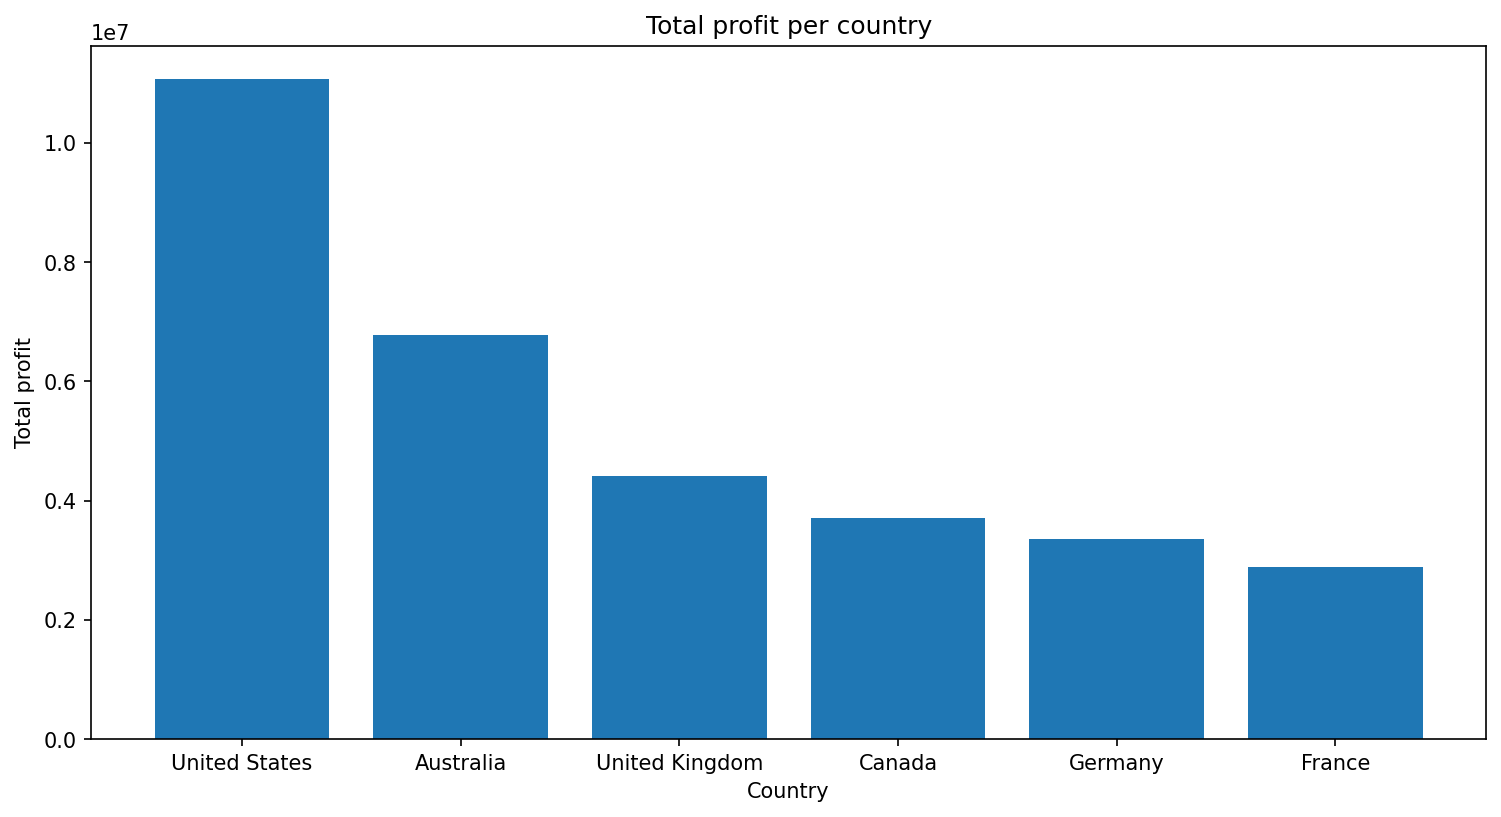

In [26]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1, figsize = (12,6), dpi = 150)

ax.bar(x=df_profit["Country"], height=df_profit["Total_profit"])
ax.set(xlabel = "Country", ylabel="Total profit", title = "Total profit per country")
fig.savefig("profit_per_country.png")

### Dates


In [45]:

df.loc["2013"].sort_values(by="Date")

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2013-01-01,1,January,2013,19,Youth (<25),F,United States,Washington,Bikes,Road Bikes,"Road-150 Red, 48",1,2171,3578,620,2171,2791
2013-01-01,1,January,2013,37,Adults (35-64),F,Germany,Hamburg,Bikes,Road Bikes,"Road-250 Black, 48",1,1555,2443,717,1555,2272
2013-01-01,1,January,2013,36,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",1,1266,2320,1008,1266,2274
2013-01-01,1,January,2013,29,Young Adults (25-34),M,United States,Oregon,Bikes,Road Bikes,"Road-650 Black, 44",1,487,783,186,487,673
2013-01-01,1,January,2013,42,Adults (35-64),M,Australia,Queensland,Bikes,Road Bikes,"Road-350-W Yellow, 48",1,1083,1701,346,1083,1429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31,31,December,2013,58,Adults (35-64),M,United Kingdom,England,Clothing,Jerseys,"Long-Sleeve Logo Jersey, M",29,38,50,290,1102,1392
2013-12-31,31,December,2013,22,Youth (<25),M,Germany,Nordrhein-Westfalen,Bikes,Road Bikes,"Road-250 Black, 44",1,1555,2443,570,1555,2125
2013-12-31,31,December,2013,22,Youth (<25),F,United Kingdom,England,Accessories,Bottles and Cages,Water Bottle - 30 oz.,27,2,5,76,54,130


In [46]:
df.loc["2013"]["Country"].value_counts()  # Count the occurrences of each country in the year 2013

Country
United States     8511
Australia         5335
Canada            3086
United Kingdom    2966
France            2291
Germany           2254
Name: count, dtype: int64

### Profit per age group

In [61]:
import duckdb

df_small_groups = duckdb.query(
    """
    SELECT 
        age_group,
        country,
        customer_gender,
        SUM(profit) AS Total_Profit,
        COUNT(*) AS Number_Rows
    FROM
        df
    GROUP BY
        age_group, country, customer_gender
        HAVING
        Number_Rows < 1000
    ORDER BY
        Total_Profit DESC
""").df()

df_small_groups

,Age_Group,Country,Customer_Gender,Total_Profit,Number_Rows
0,Youth (<25),Germany,M,218274.0,864
1,Youth (<25),Germany,F,217009.0,844
2,Youth (<25),France,M,180075.0,746
3,Youth (<25),France,F,172387.0,844
4,Seniors (64+),United States,M,29603.0,168
5,Seniors (64+),United States,F,27084.0,110
6,Seniors (64+),Canada,F,12187.0,66
7,Seniors (64+),Australia,M,11432.0,42
8,Seniors (64+),Germany,M,11361.0,68
9,Seniors (64+),United Kingdom,F,11296.0,56


In [65]:
df_senior_female = df_small_groups.query("Age_Group == 'Seniors (64+)' and Customer_Gender == 'F'")
df_senior_female

,Age_Group,Country,Customer_Gender,Total_Profit,Number_Rows
5,Seniors (64+),United States,F,27084.0,110
6,Seniors (64+),Canada,F,12187.0,66
9,Seniors (64+),United Kingdom,F,11296.0,56
12,Seniors (64+),Australia,F,6489.0,16
13,Seniors (64+),France,F,4323.0,48
14,Seniors (64+),Germany,F,3676.0,38


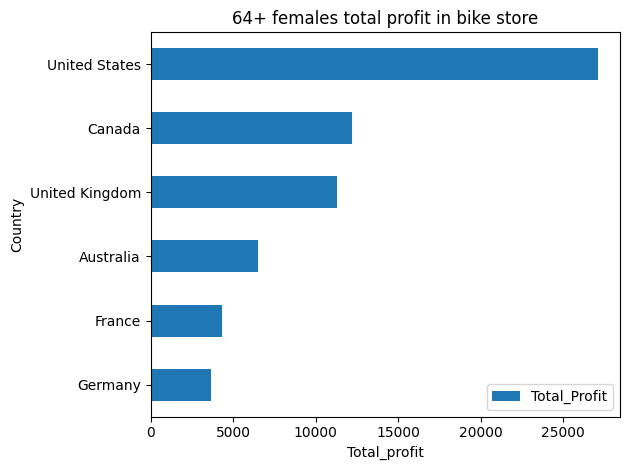

In [71]:
ax = df_senior_female.plot(kind = "barh", x="Country", y="Total_Profit")
ax.set(title="64+ females total profit in bike store", 
       xlabel="Total_profit",
       ylabel="Country")
ax.invert_yaxis()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("profit_per_country_senior_females", dpi= 200)